In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install emoji
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

  Using cached emoji-2.8.0-py2.py3-none-any.whl (358 kB)


In [ ]:
import emoji

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('emails.csv')


print(data.head())
print("")


print(data.describe())
print("")


X = data['text']
y = data['spam']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000



In [ ]:
data.drop_duplicates(inplace=True)


data.dropna(inplace=True)

def clean_text(text):
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [ ]:
data['cleaned_email_body'] = data['text'].apply(clean_text)

print(data[['text', 'cleaned_email_body']].head())

                                                text  \
0  Subject: naturally irresistible your corporate...   
1  Subject: the stock trading gunslinger  fanny i...   
2  Subject: unbelievable new homes made easy  im ...   
3  Subject: 4 color printing special  request add...   
4  Subject: do not have money , get software cds ...   

                                  cleaned_email_body  
0  Subject naturally irresistible your corporate ...  
1  Subject the stock trading gunslinger  fanny is...  
2  Subject unbelievable new homes made easy  im w...  
3  Subject  color printing special  request addit...  
4  Subject do not have money  get software cds fr...  


In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               u"\U0001F780-\U0001F7FF"
                               u"\U0001F800-\U0001F8FF"
                               u"\U0001F900-\U0001F9FF"
                               u"\U0001FA00-\U0001FA6F"
                               u"\U0001FA70-\U0001FAFF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
data['cleaned_email_body'] = data['cleaned_email_body'].apply(remove_emojis)

print("Cleaned Email Bodies with Emojis Removed:")
print(data[['text', 'cleaned_email_body']].head())

Cleaned Email Bodies with Emojis Removed:
                                                text  \
0  Subject: naturally irresistible your corporate...   
1  Subject: the stock trading gunslinger  fanny i...   
2  Subject: unbelievable new homes made easy  im ...   
3  Subject: 4 color printing special  request add...   
4  Subject: do not have money , get software cds ...   

                                  cleaned_email_body  
0  Subject naturally irresistible your corporate ...  
1  Subject the stock trading gunslinger  fanny is...  
2  Subject unbelievable new homes made easy  im w...  
3  Subject  color printing special  request addit...  
4  Subject do not have money  get software cds fr...  


In [ ]:
nltk.download('wordnet')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def apply_nltk_stemming_and_lemmatization(text):
    stemmed_text = ' '.join([ps.stem(word) for word in text.split()])
    lemmatized_text = ' '.join([wnl.lemmatize(word) for word in text.split()])
    return stemmed_text, lemmatized_text

In [ ]:
def apply_spacy_lemmatization(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text


In [ ]:
data['stemmed_email_body'], data['lemmatized_email_body_nltk'] = \
    zip(*data['cleaned_email_body'].map(apply_nltk_stemming_and_lemmatization))

data['lemmatized_email_body_spacy'] = data['cleaned_email_body'].apply(apply_spacy_lemmatization)

print(data[['cleaned_email_body', 'stemmed_email_body', 'lemmatized_email_body_nltk', 'lemmatized_email_body_spacy']].head())

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_valid_tfidf)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8516579406631762
Precision: 1.0
Recall: 0.41379310344827586
F1 Score: 0.5853658536585366


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer()


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_valid_tfidf = tfidf_vectorizer.transform(X_valid)


Text(0, 0.5, 'Actual')

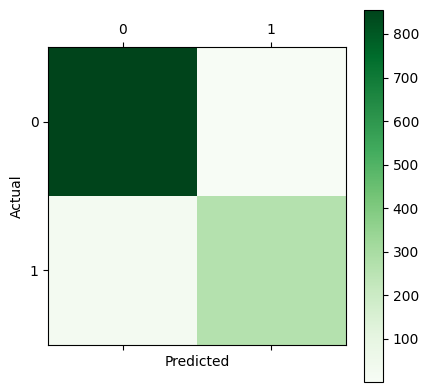

In [ ]:
lr_classifier = LogisticRegression()

lr_classifier.fit(X_train_tfidf, y_train)

y_pred_lr = lr_classifier.predict(X_valid_tfidf)

accuracy_lr = accuracy_score(y_valid, y_pred_lr)

cm = confusion_matrix(y_valid, y_pred_lr)

plt.matshow(cm, cmap=plt.cm.Greens)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
import numpy as np
import pandas as pd
import string
from collections import Counter

In [ ]:
def get_top_words(text, top_n=10):
    words = text.split()
    word_counts = Counter(words)
    top_words = [word for word, count in word_counts.most_common(top_n)]
    return top_words

In [ ]:
def extract_handcrafted_features(text):
    text_length = len(text)
    words = text.split()
    average_word_length = np.mean([len(word) for word in words])
    capital_letters = sum(1 for char in text if char.isupper())
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    numerals = sum(1 for char in text if char.isdigit())
    top_words = get_top_words(text, top_n=10)

    return [text_length, average_word_length, capital_letters, punctuation_count, numerals, top_words]


In [ ]:

data['handcrafted_features'] = data['text'].apply(extract_handcrafted_features)

data[['length', 'average_word_length', 'capital_letters', 'punctuation_count', 'numerals', 'top_words']] = pd.DataFrame(data['handcrafted_features'].tolist(), index=data.index)

print(data[['length', 'average_word_length', 'capital_letters', 'punctuation_count', 'numerals', 'top_words']])


      length  average_word_length  capital_letters  punctuation_count  \
0       1484             3.527778                1                136   
1        598             5.685393                1                  1   
2        448             4.057471                1                  8   
3        500             4.040816                1                 25   
4        235             3.480769                1                 13   
...      ...                  ...              ...                ...   
5723    1189             2.919192                1                113   
5724    1167             3.647541                1                 71   
5725    2131             2.992233                1                177   
5726    1060             2.713768                1                113   
5727    2331             4.144144                1                 88   

      numerals                                          top_words  
0            3         [_, ., :, your, will, a, the, an

In [ ]:

total_length = data['length'].sum()
total_average_word_length = data['average_word_length'].sum()
total_capital_letters = data['capital_letters'].sum()
total_punctuation_count = data['punctuation_count'].sum()
total_numerals = data['numerals'].sum()

In [ ]:
print("Total Length:", total_length)
print("Total Average Word Length:", total_average_word_length)
print("Total Capital Letters:", total_capital_letters)
print("Total Punctuation Count:", total_punctuation_count)
print("Total Numerals:", total_numerals)

Total Length: 8873192
Total Average Word Length: 21323.465127020296
Total Capital Letters: 5695
Total Punctuation Count: 480165
Total Numerals: 212930


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()

positive_words = ["good", "happy", "joy", "positive"]
negative_words = ["bad", "sad", "anger", "negative"]

In [ ]:

def count_positive_words(sentence):
    tokens = sentence.split()
    positive_count = sum(1 for token in tokens if token in positive_words)
    return positive_count


In [ ]:
def count_negative_words(sentence):
    tokens = sentence.split()
    negative_count = sum(1 for token in tokens if token in negative_words)
    return negative_count


In [ ]:
data['positive_word_count'] = data['text'].apply(count_positive_words)
data['negative_word_count'] = data['text'].apply(count_negative_words)


Text(0, 0.5, 'Frequency')

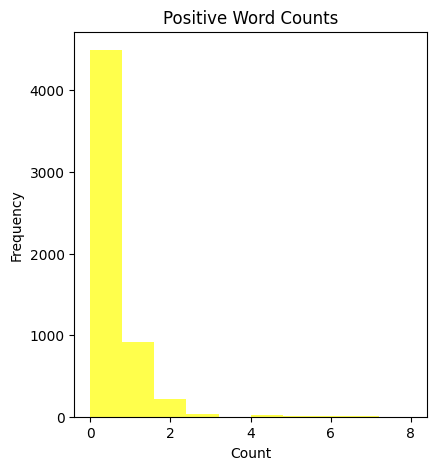

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['positive_word_count'], bins=10, color='yellow', alpha=0.7)
plt.title('Positive Word Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')


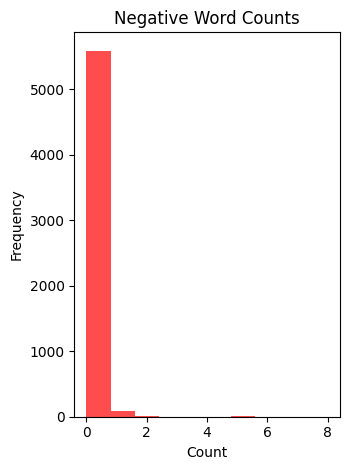

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(data['negative_word_count'], bins=10, color='red', alpha=0.7)
plt.title('Negative Word Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
l1_classifier = LogisticRegression(penalty='l1', solver='saga', C=1.0)

l1_classifier.fit(X_train_tfidf, y_train)

y_pred_l1 = l1_classifier.predict(X_train_tfidf)

accuracy_l1 = accuracy_score(y_train, y_pred_l1)
print("Accuracy with L1 regularization:", accuracy_l1)

l2_classifier = LogisticRegression(penalty='l2', C=1.0)

l2_classifier.fit(X_train_tfidf, y_train)

y_pred_l2 = l2_classifier.predict(X_train_tfidf)

accuracy_l2 = accuracy_score(y_train, y_pred_l2)
print("Accuracy with L2 regularization:", accuracy_l2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy with L1 regularization: 0.9783937145351375
Accuracy with L2 regularization: 0.99628982976866
